## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
#we are using temp as output feature bcz regression problem
#create regression algorithm which will predict temperature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\mani\\Desktop\\full stack data science pro\\End to end project algerian 1\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [6]:
## missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [7]:
df.loc[:122,'Region'] = 0  #taking 0 & 1
df.loc[122:,'Region'] = 1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
# removing the null values--only two null values
df = df.dropna().reset_index(drop=True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
## remove the 122nd row--dro-bccz we have special characters
df = df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
##fix spaces in column names
df.columns = df.columns.str.strip()  ##removing empty s[paces]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


## change the required columns as integer data type

In [22]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [24]:
df.head()
#some have float values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


## Changing the other columns to float data type

In [25]:
objects = [features for features in df.columns if df[features].dtypes=='O']  #'o'=object

In [26]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [27]:
# classes is categorical--so whatever in objects not classes then only convert into float
for i in objects:
    if i!='Classes':
        df[i] = df[i].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [29]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
## all cleaned dataset need to save in n ew file csv
df.to_csv('Algerian_forest_fires_cleaned_dataset_byme.csv',index=False)

## Exploratory Data Analysis

In [33]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
## drop day,month,year
## drop day,month and year
#date not play important role to predict temperature
df_copy=df.drop(['day','month','year'],axis=1)

In [35]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
## categories in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [37]:
## Encoding of the categories in classes--whereevr fire--make it as 0 and notfire=1
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [38]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [40]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<ipython-input-41-8462aac3c001>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


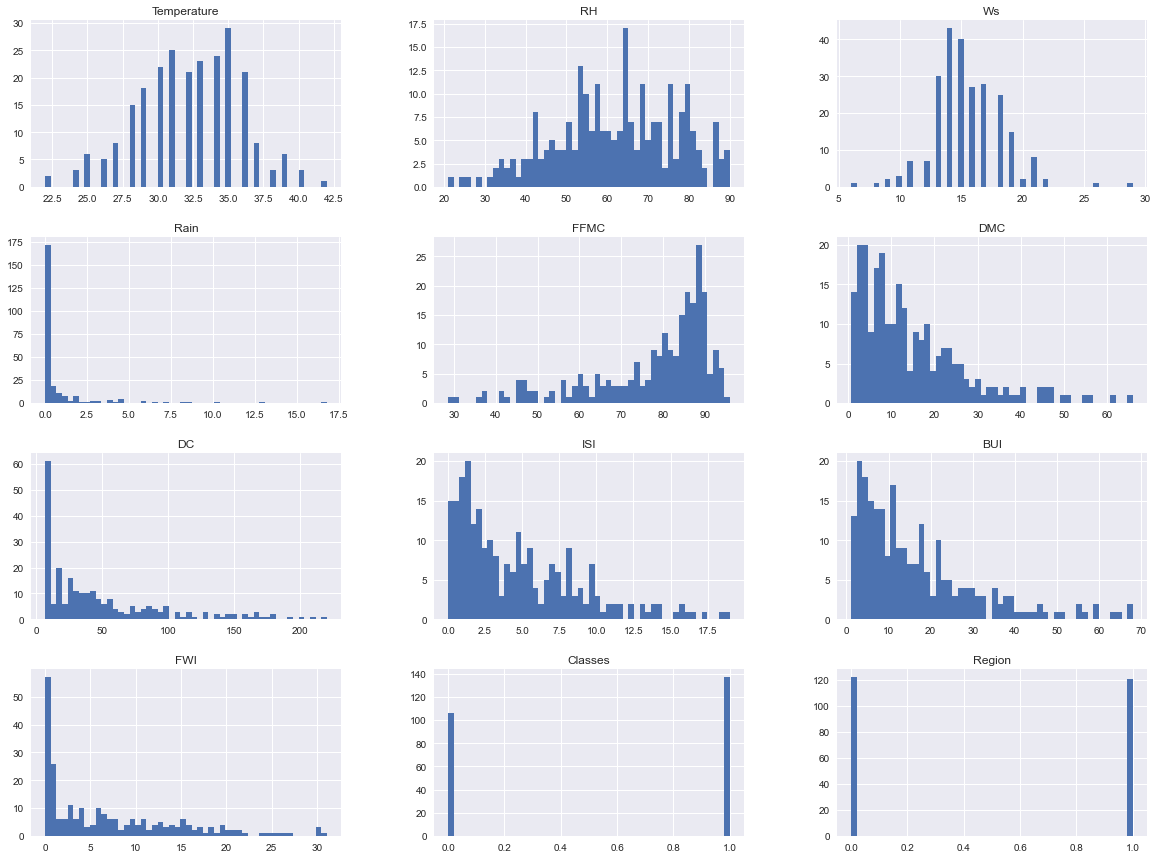

In [41]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
## Percentage for Pie Chart---for only classes
percentage=df_copy['Classes'].value_counts(normalize=True)*100

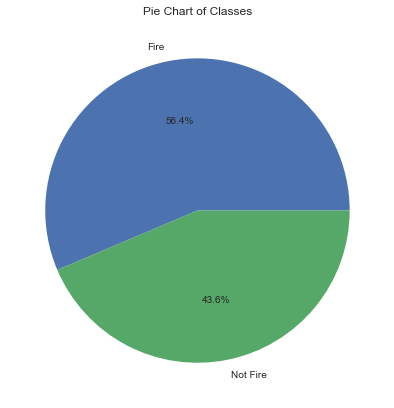

In [43]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%') #autopct--gives percentage
plt.title("Pie Chart of Classes")
plt.show()

## Correlation

In [44]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

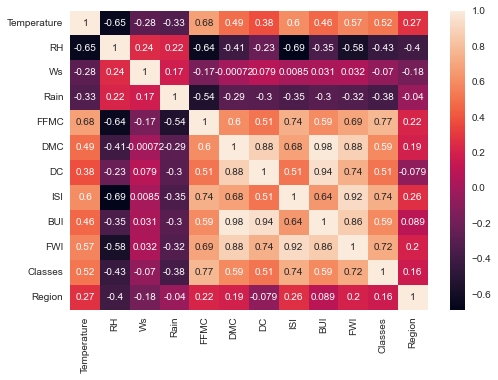

In [45]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

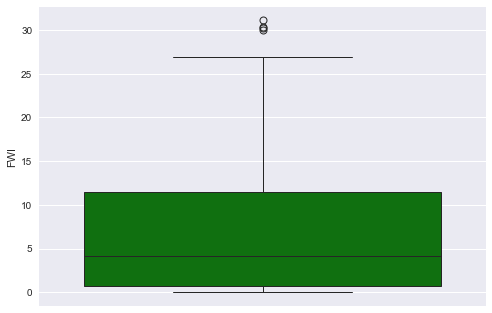

In [46]:
## Box Plots
sns.boxplot(df['FWI'],color='green')
#boxplot w.r.t any feature

In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
#replace not fire 

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

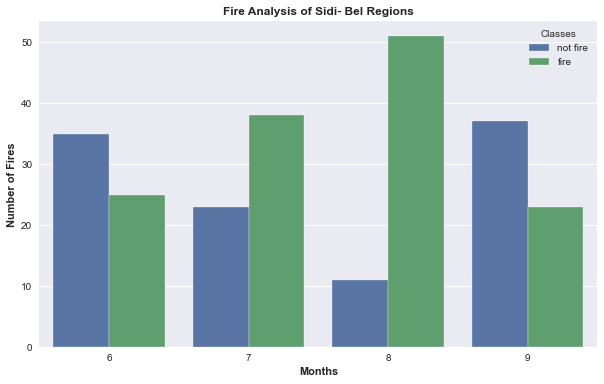

In [49]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

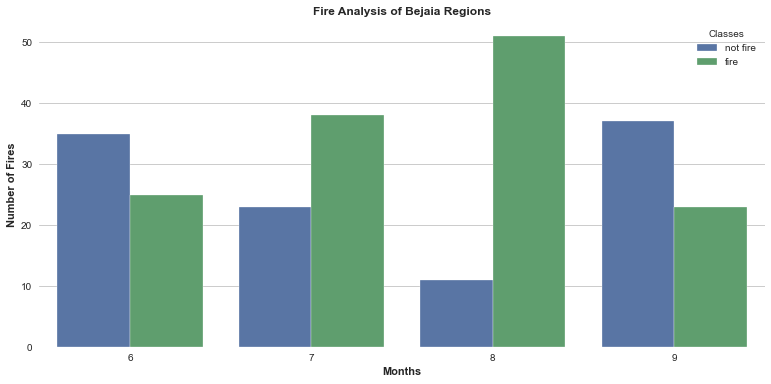

In [50]:
## Monthly Fire Analysis--for differebnt regions
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Regions",weight='bold')

# Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

# MODEL TRAINING

In [51]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [52]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [53]:
## Independent and dependent features
X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']

In [54]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [55]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [56]:
## Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [57]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [58]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## if any two independent correlation is 90-95% then both act as same --so if i remove/drop one feature also not a problem
#-85/-90
#threshhold decided by domain experts

<Axes: >

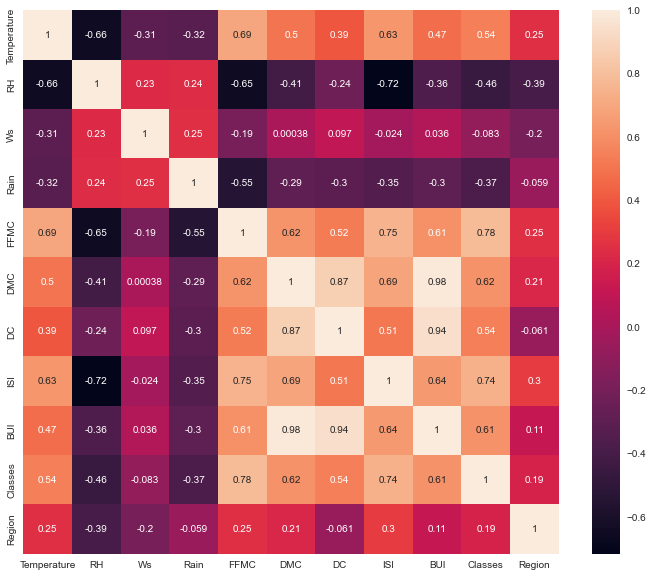

In [59]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [60]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [61]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):  #iterating through each column
        for j in range(i):                        #iterating through each element in column
            if abs(corr_matrix.iloc[i, j]) > threshold: ##i,j ---each column every element--handling -ve values with absolute
                colname = corr_matrix.columns[i]        ## create new variable and save it
                col_corr.add(colname)                   # add in that set
    return col_corr

In [62]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [63]:
corr_features

{'BUI', 'DC'}

In [64]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [66]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [67]:
X_train_scaled

,0,1,2,3,4,5,6,7,8
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...,...
177,-2.195553,1.317365,-0.219054,-0.196914,-2.286163,-1.096748,-1.069486,-1.104315,-0.989071
178,-1.113385,1.183793,0.540333,1.066320,-1.971876,-0.930289,-1.023186,-1.104315,-0.989071
179,-1.925011,0.916651,0.540333,2.984564,-2.209337,-1.065041,-1.069486,-1.104315,-0.989071
180,0.509868,-0.218705,0.160640,-0.384060,0.730997,0.377603,0.597325,0.905539,1.011050


In [68]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


## Box Plots To understand Effect Of Standard Scaler

<ipython-input-69-b56d0f4aeb67>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

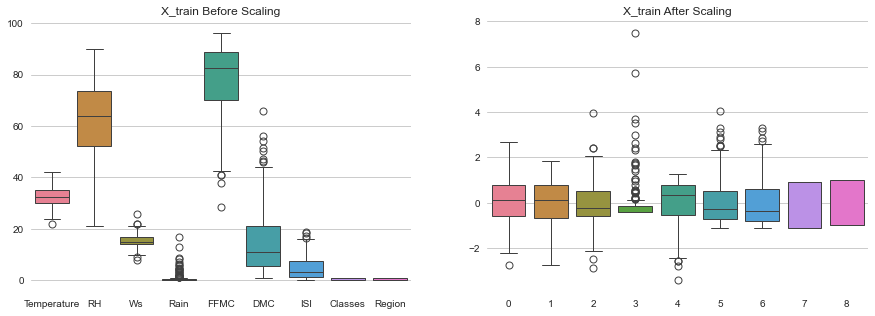

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
#before scaling range is diffrent but after scaling range is same

## Linear Regression Model

Mean absolute error 0.546823646524997
R2 Score 0.9847657384266951


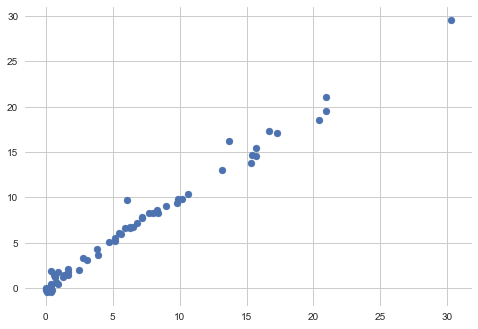

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#98% accuracy--error is less

## Lasso Regression

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


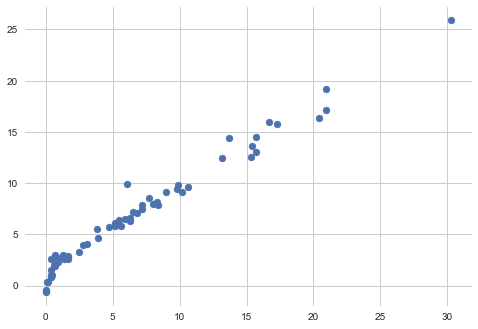

In [81]:
from sklearn.linear_model import Lasso   #by default alpha is zero
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
#why reduced--it removes over fitting

### Cross Validation Lasso

In [73]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6199701158263431
R2 Score 0.9820946715928275


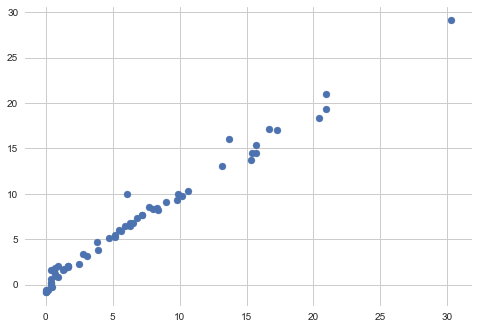

In [74]:
#prediction w.r.t x_test data
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
#98%accuracy

## Ridge Regression model

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513


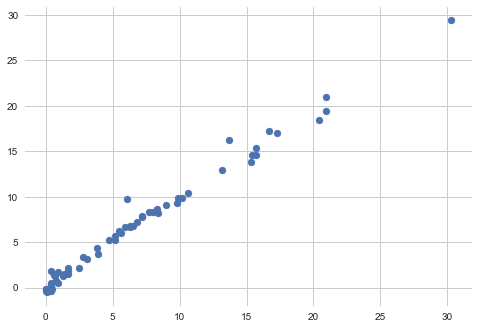

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513


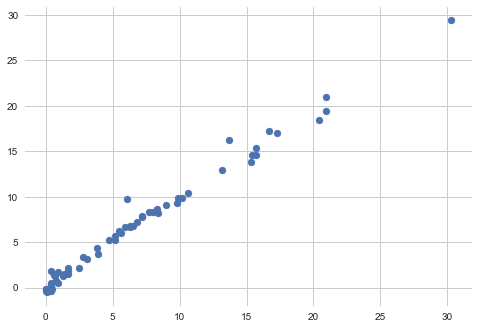

In [83]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [77]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


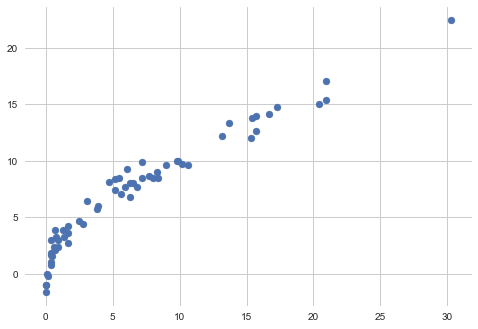

In [78]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
#accuracy 87%

Mean absolute error 0.6575946731430901
R2 Score 0.9814217587854941


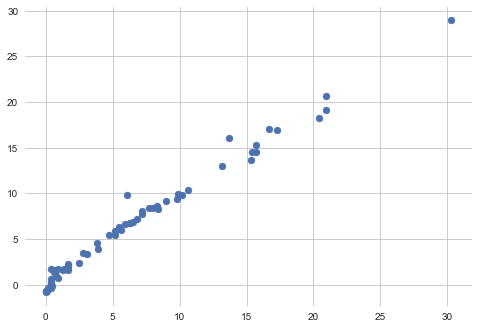

In [79]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [80]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [ ]:
#from above i took best accuracy given 

## Pickle the mmachine learning models, preprocessing model standardscaler

In [ ]:
#saving the file

In [84]:
scaler

StandardScaler()

In [85]:
ridgecv   #bcz accuracy is good

RidgeCV(cv=5)

In [ ]:
#these are two models i am going to use

In [86]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))  #wb-write byte mode
pickle.dump(ridge,open('ridge.pkl','wb'))

In [ ]:
#to do predictions
#load scaler.pickel and ridge.pickle for doing standard scaling and prediction
#we will get the new data ,do standard scaling,predicting